In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import os
from utils import *
from matplotlib.colors import ListedColormap

In [2]:
import importlib
import utils 
importlib.reload(utils)
from utils import *

In [3]:
path = 'Data/N11_ThetaPola_DATA/'
# path = 'Data/N15_ThetaPola_DATA/'
files = [f for f in os.listdir(path) if f.endswith('mat')]
files.sort() # sort files so the polarization and theta are right next to each other in the list 

for element1, element2 in zip(files[::2], files[1::2]):
    print(f"{element1:} {element2:}")

theta_trajs = [] 
pol_trajs = []

for f in files: 
    if f.endswith('POLARIZATION.mat'):
        pol_trajs.append(loadmat(path+f)['POLA'])
    else: 
        theta_trajs.append(loadmat(path+f)['THETAd'])

N11_1_R200_B30_04_05_POLARIZATION.mat N11_1_R200_B30_04_05_ThetaTime.mat
N11_1_R200_B50_04_05_POLARIZATION.mat N11_1_R200_B50_04_05_ThetaTime.mat
N11_1_R200_B50_25_04_POLARIZATION.mat N11_1_R200_B50_25_04_ThetaTime.mat
N11_1_R200_B50_26_04_POLARIZATION.mat N11_1_R200_B50_26_04_ThetaTime.mat
N11_2_R200_B50_26_04_POLARIZATION.mat N11_2_R200_B50_26_04_ThetaTime.mat
N11_3_R200_B50_25_04_POLARIZATION.mat N11_3_R200_B50_25_04_ThetaTime.mat
N11_4_R200_B100_25_04_POLARIZATION.mat N11_4_R200_B100_25_04_ThetaTime.mat
N11_4_R200_B30_25_04_POLARIZATION.mat N11_4_R200_B30_25_04_ThetaTime.mat
N11_4_R200_B50_25_04_POLARIZATION.mat N11_4_R200_B50_25_04_ThetaTime.mat
N11_5_R200_B30_25_04_POLARIZATION.mat N11_5_R200_B30_25_04_ThetaTime.mat
N11_5_R200_B50_25_04_POLARIZATION.mat N11_5_R200_B50_25_04_ThetaTime.mat


In [4]:
print(list(map(len, theta_trajs)))
print(list(map(len, pol_trajs)))

is_finite = lambda p: np.isfinite(p[2])

del_list = [] 

for (i, (theta, p)) in enumerate(zip(theta_trajs, pol_trajs)): 
    if np.any(np.isnan(p[:, 2]))or len(theta) != 5000: 
        del_list.append(i)
        
print('deleting lists: ', del_list)
for index in sorted(del_list, reverse=True):
    del theta_trajs[index]
    del pol_trajs[index]

[5000, 5000, 2450, 5000, 5000, 3000, 5000, 5000, 5000, 1300, 5000]
[5000, 5000, 2400, 5000, 5000, 3000, 5000, 5000, 5000, 1300, 5000]
deleting lists:  [2, 5, 9]


In [5]:
f1 = lambda x: (x[:, 1])/180*np.pi - np.mean(x[:, 1])/180*np.pi
f2 = lambda x: np.mean((x[:, 1:4]), axis=1) # - np.mean(x[:, 1:4]))
f3 = lambda x: x[:, 2] #- np.mean(x[:, 2])
dt = theta_trajs[0][0, 0] 
data = np.array([np.stack([f1(theta), f3(p)]) for (theta, p) in zip(theta_trajs, pol_trajs)])

In [17]:
for i in range(len(data)): 
    print(np.var(data[i][0]))

0.006951634147298612
0.005613626869428094
0.007545583892512364
0.006312769181906008
0.006162955356110828
0.002449538753239528
0.0033932301706250966
0.0036845056085262036


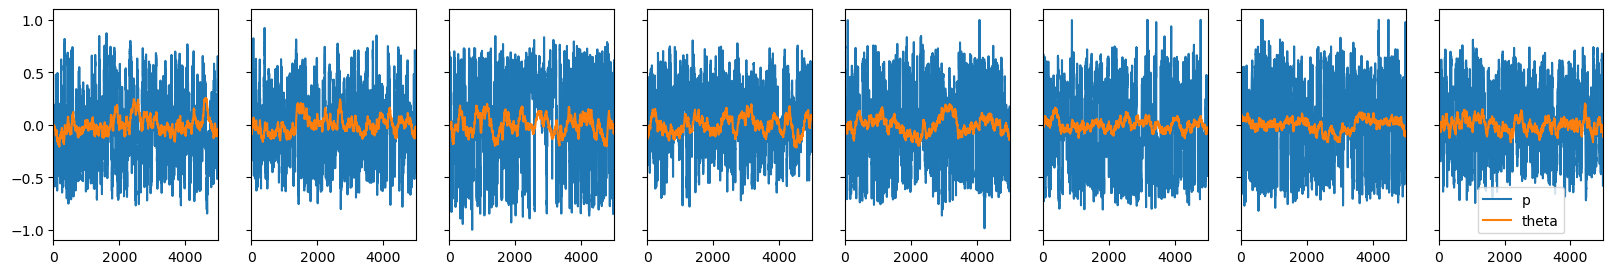

In [6]:
show(data)

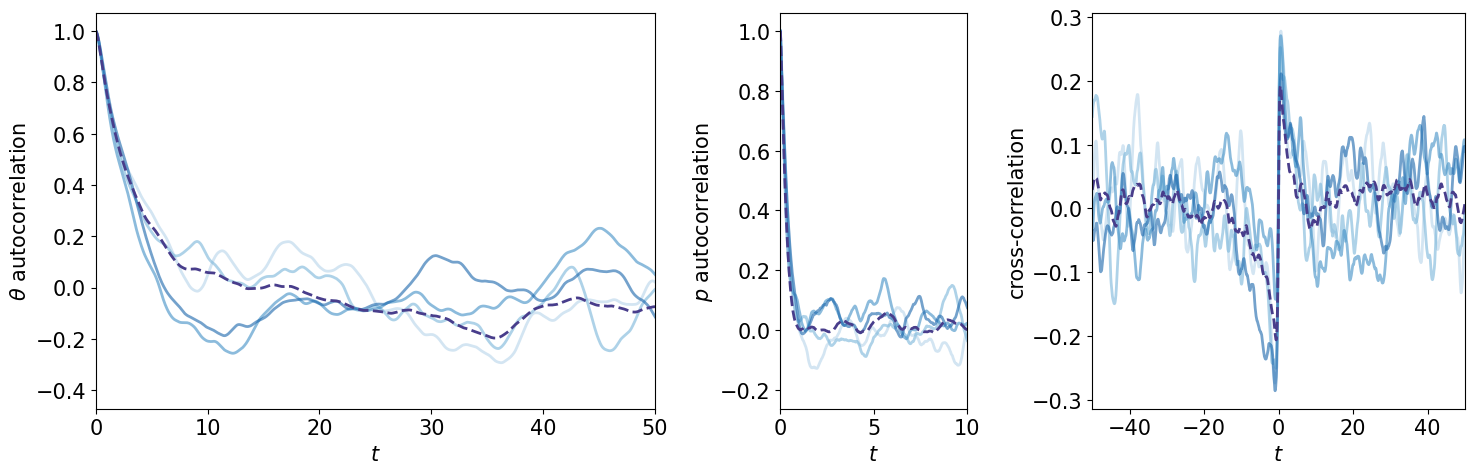

In [7]:
plt.rcParams.update({'lines.linewidth': 2})
plt.rc('text', usetex=False)
plt.rc('font', family='sans serif', size=15)
_, _, cc = plot_corr(data, 3000, dt, norm=True, tex=True, colors=['Blues', 'darkslateblue'], n_trajs=4)
plt.savefig('Figures/data_corr.pdf')
plt.show() 

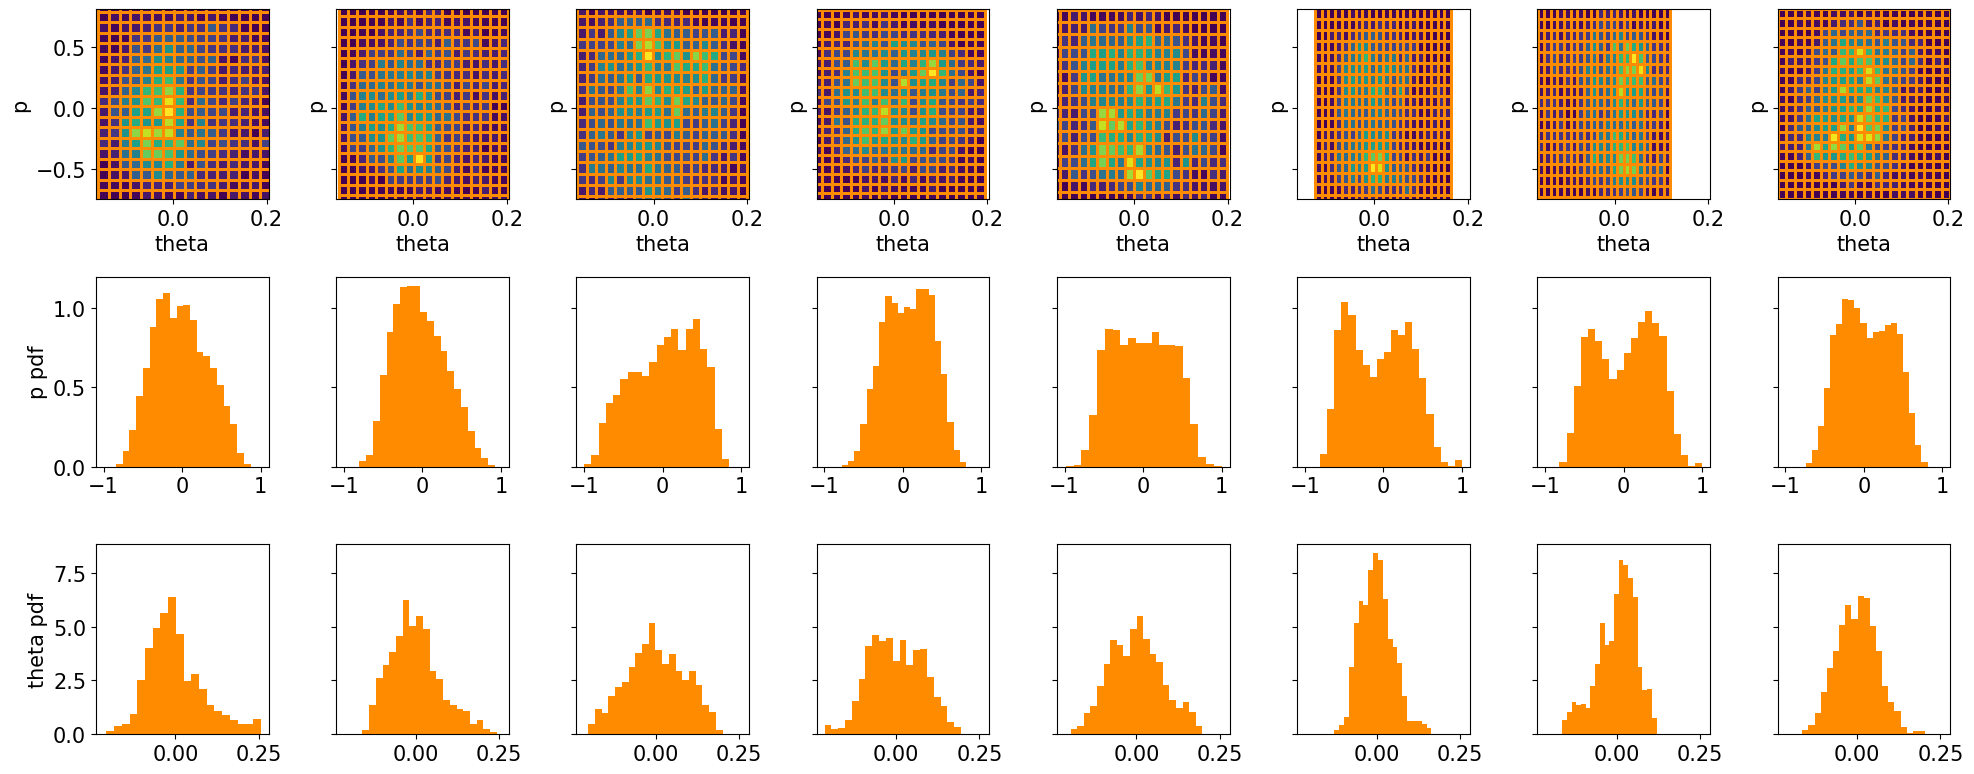

In [8]:
plot_dist(data)

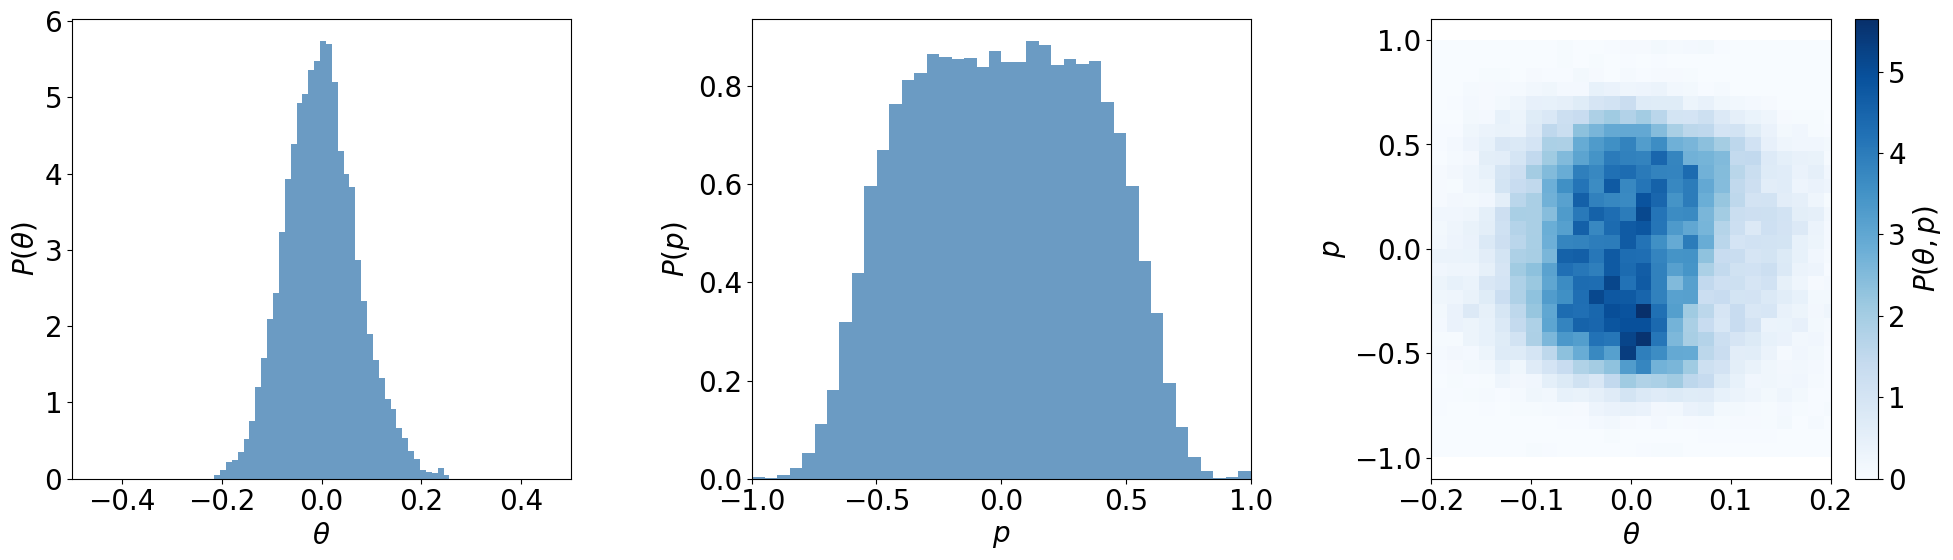

In [9]:
fig, axes = plot_overall_dist(data, tex=False, color='steelblue', cmap='Blues')
axes[2].set_xlim([-0.2, 0.2])
axes[2].set_ylim([-1.1, 1.1])
plt.savefig('Figures/overall_dist.pdf')
plt.show() 

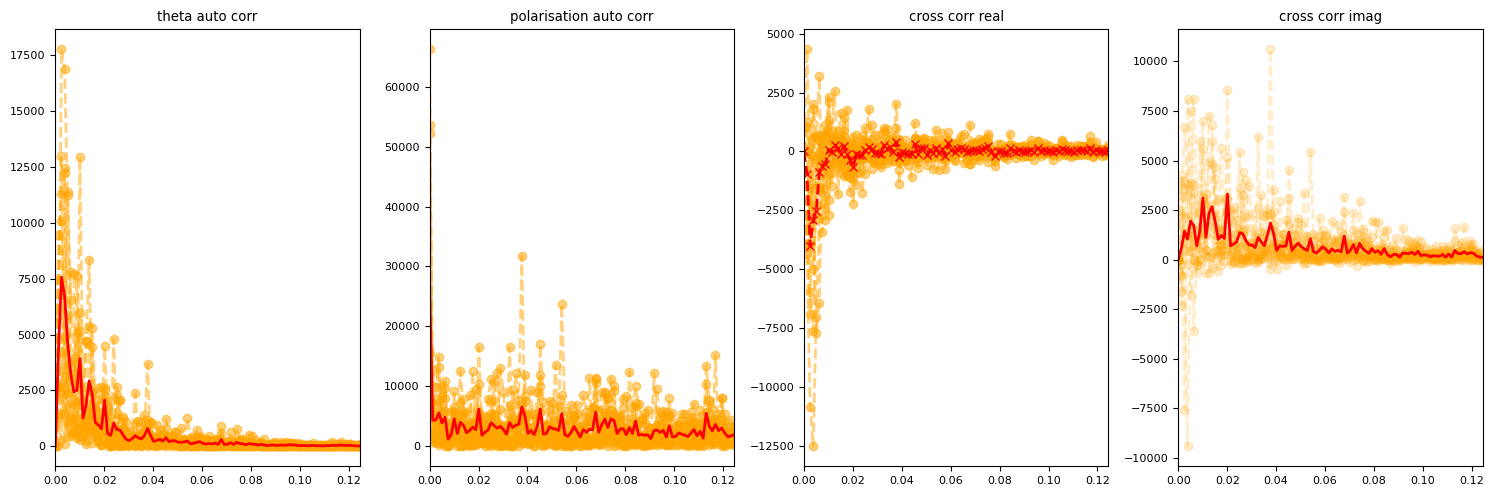

(array([3.13349909e-28, 4.25174599e+03, 7.56142496e+03, ...,
        2.24890106e-02, 1.09820274e-02, 2.22129722e-02]),
 array([2.62501358e+04, 4.35819536e+03, 4.40489128e+03, ...,
        9.43610601e+00, 4.60304608e+00, 1.13738057e+00]),
 array([ 1.80409712e-12+0.00000000e+00j, -9.63612477e+02+5.72842808e+02j,
        -4.01870467e+03+1.43705099e+03j, ...,
         2.09884478e-01-1.34462827e-01j,  5.85480085e-02+1.10281725e-02j,
        -4.65694047e-02+0.00000000e+00j]))

In [14]:
plot_corr_ft(data, dt)

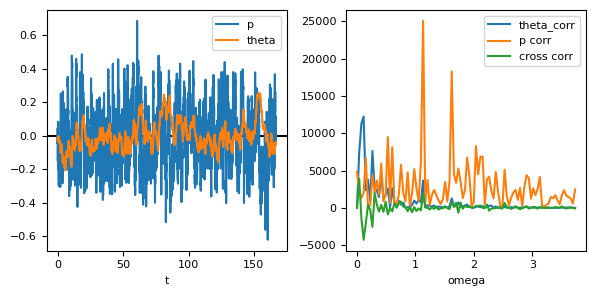

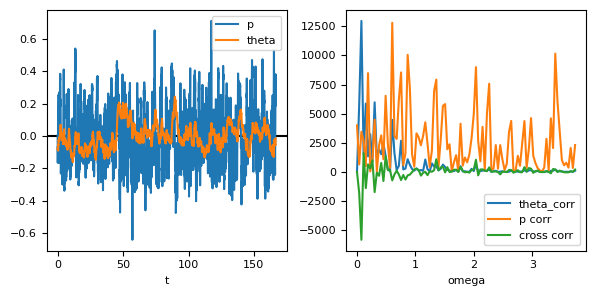

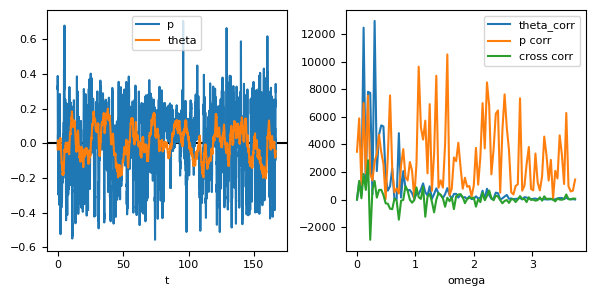

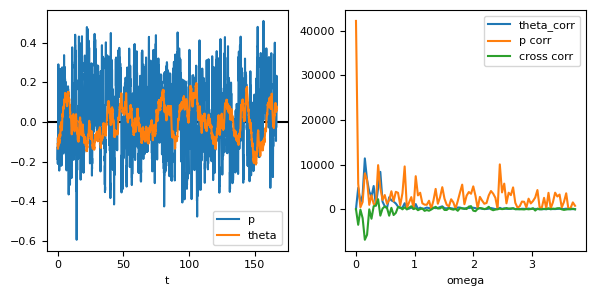

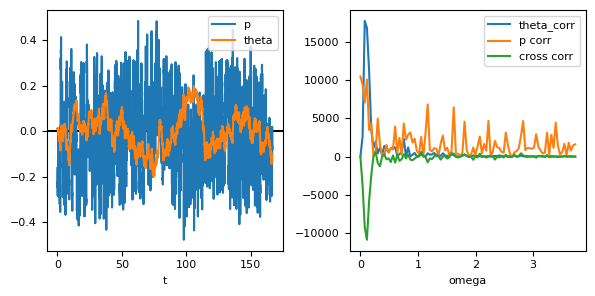

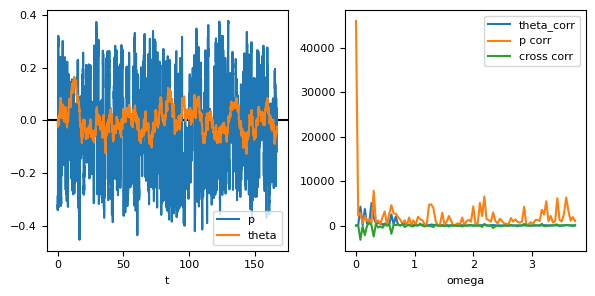

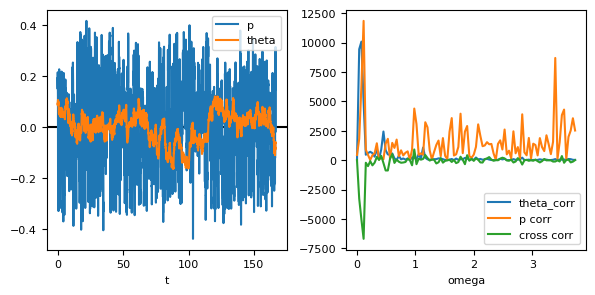

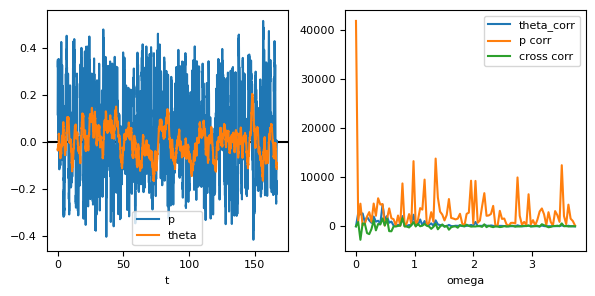

In [69]:
plt.rcParams.update({'font.size': 8, 'lines.linewidth': 1.5})

for (theta_t, p_t) in data:
    N = 5000
    
    t = dt*np.arange(N)
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    T = 500
    axs[0].axhline(y=0, color='k')
    axs[0].plot(t, p_t, label='p')
    axs[0].plot(t, theta_t, label='theta')
    axs[0].set_xlabel('t')
    axs[0].legend()
    
    omegas = np.fft.fftfreq(N, d=dt)[:100]*2*np.pi
    theta_omega = np.fft.fft(theta_t)
    p_omega = np.fft.fft(p_t)
    
    theta_corr = np.abs(theta_omega)**2
    p_corr = np.abs(p_omega)**2
    cross_corr = np.conj(theta_omega)*p_omega
    
    axs[1].plot(omegas, theta_corr[:100], label='theta_corr')
    axs[1].plot(omegas, p_corr[:100], label='p corr')
    axs[1].plot(omegas, cross_corr[:100], label='cross corr')
    axs[1].set_xlabel('omega')
    axs[1].legend() 
    plt.tight_layout()
    plt.show()